In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
video_game_df = pd.read_csv("./dataset/VideoGames/vgsales.csv", index_col=0)

> 通过观察数据可以得到该csv文件依据Global_Sales进行排序

In [3]:
video_game_df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


>通过人为找出全球销量最大的电子游戏项目，正印证了上述的论述

In [4]:
video_game_df.loc[video_game_df['Global_Sales'] == video_game_df['Global_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


>于是可以展示出最受欢迎的游戏top 5

In [5]:
video_game_df.iloc[:5, :]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


>下面分别统计最受欢型的游戏类型、发布平台、发行人

In [6]:
video_game_group_by_genre = video_game_df.drop('Year', axis=1).groupby(['Genre']).sum()
video_game_group_by_genre = pd.DataFrame(video_game_group_by_genre)

In [7]:
video_game_group_by_genre.sort_values(['Global_Sales'], ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


>最受欢迎的游戏类型是“Action”类型

Text(0, 0.5, 'Global sales')

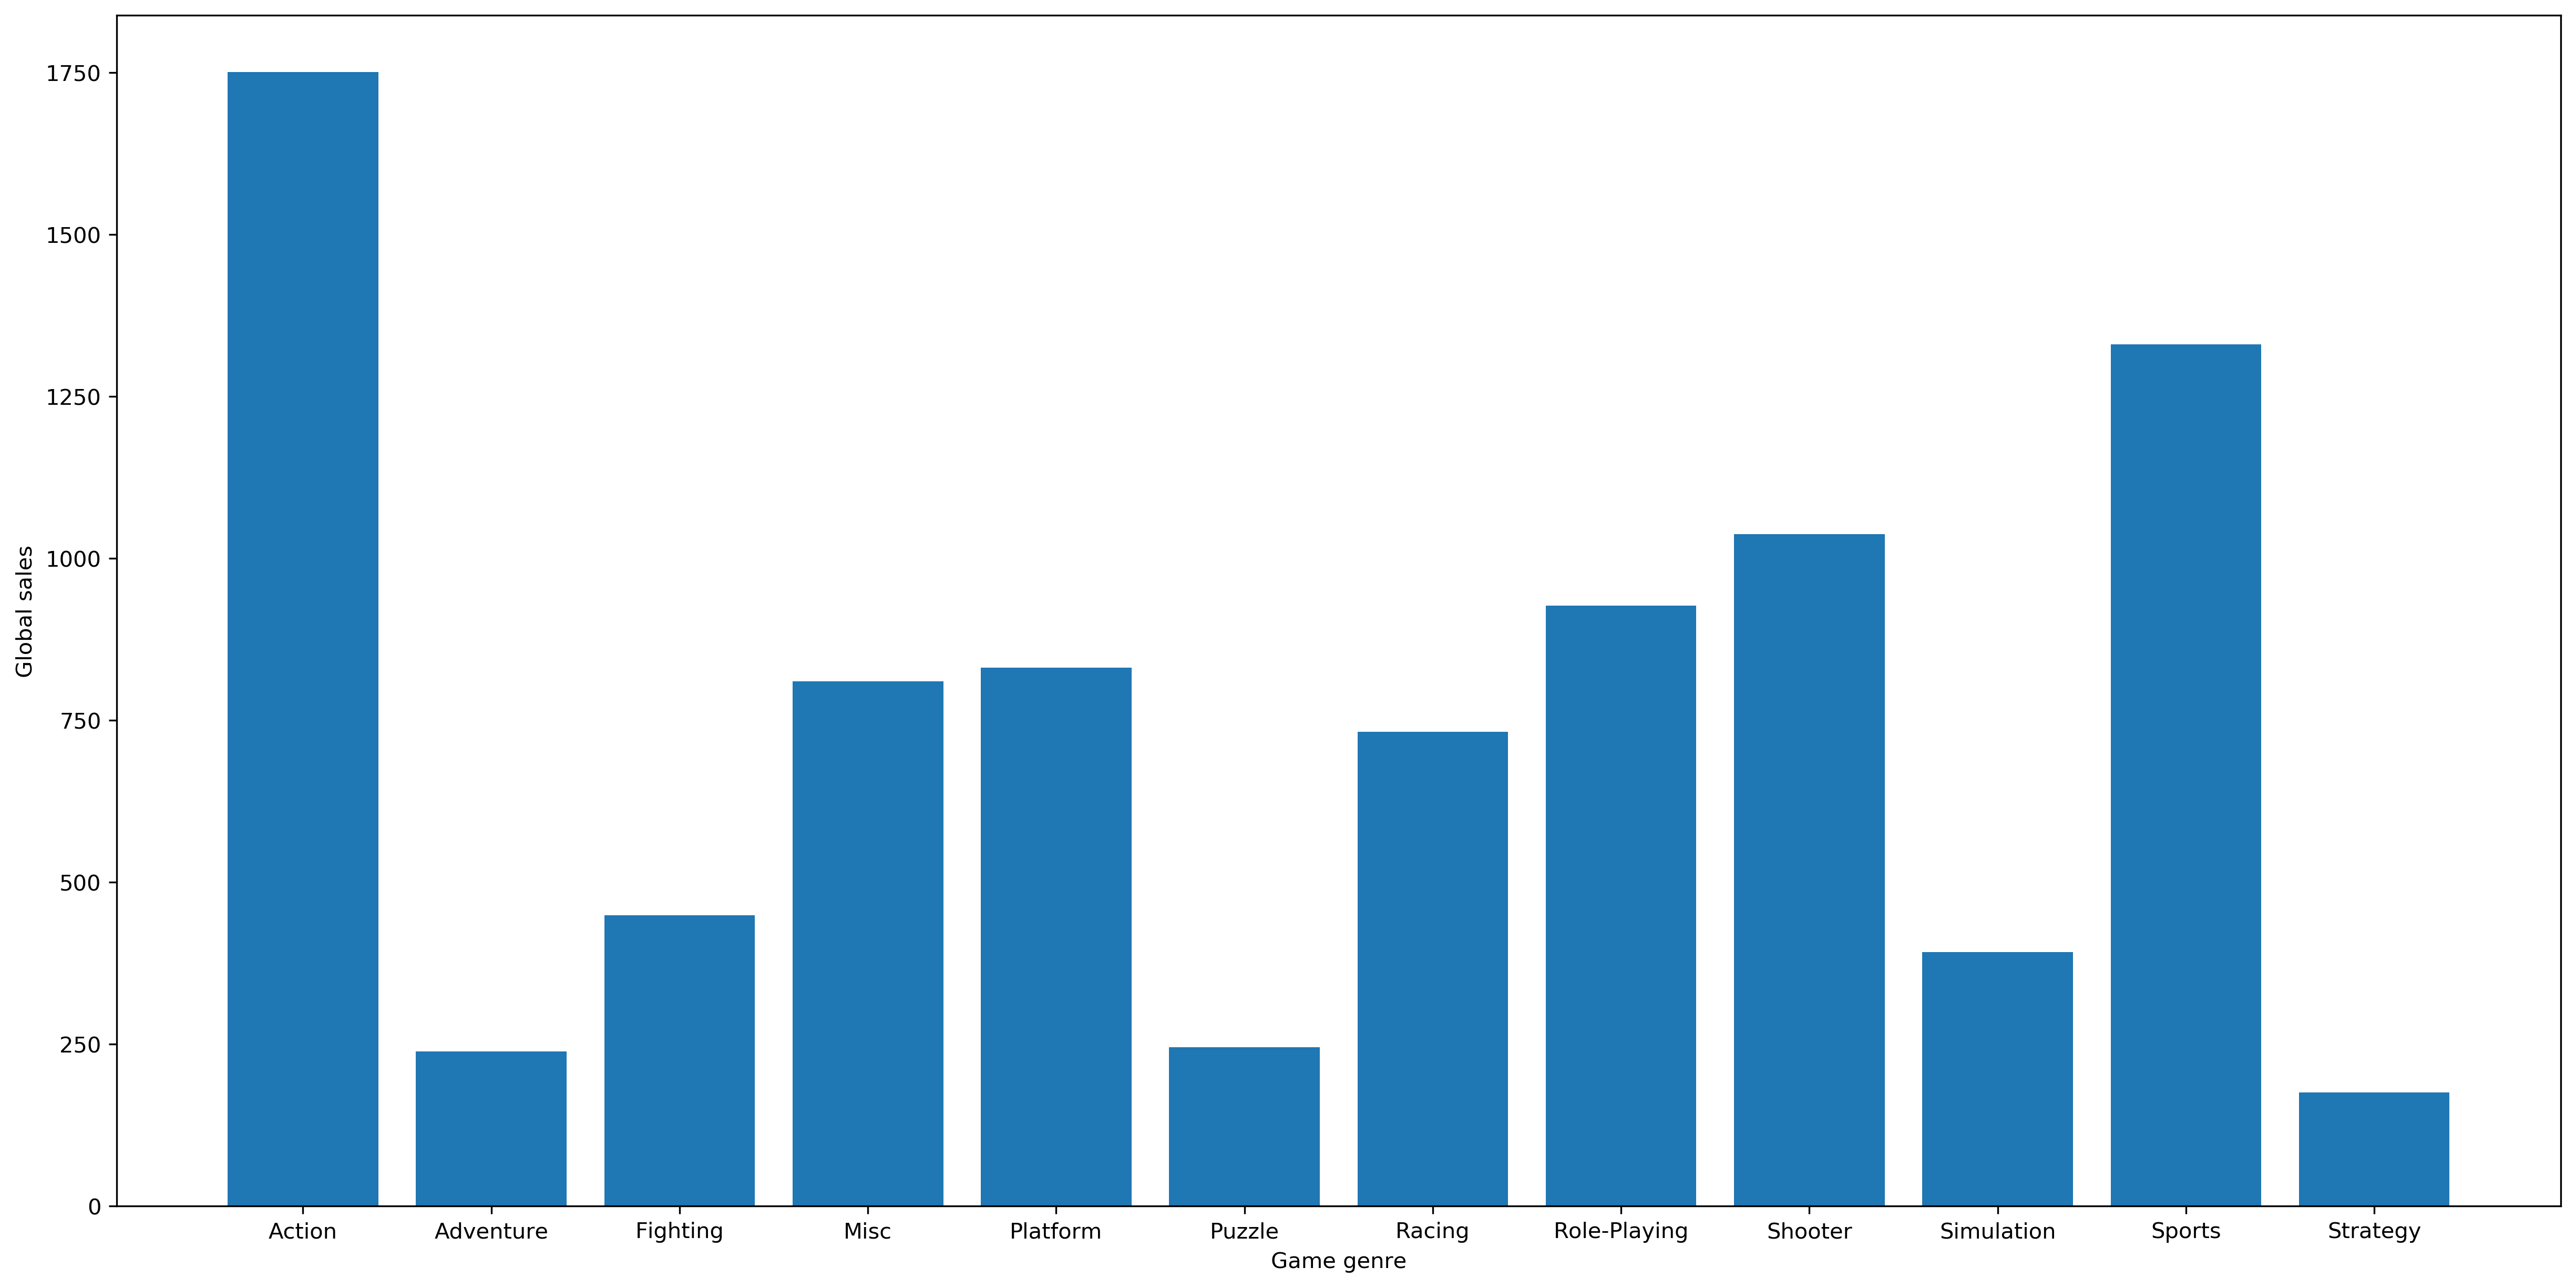

In [8]:
plt.figure(figsize=(20, 10), dpi=300)
plt.bar(video_game_group_by_genre.index, video_game_group_by_genre['Global_Sales'])
plt.xlabel("Game genre")
plt.ylabel("Global sales")

>由以下分析可见，最受欢迎的电子游戏平台前五名分别是
1. PS2
2. X360
3. PS3
4. Wii
5. DS   

>并且整体分布具有较明显的不平衡特性以及长尾效应

In [9]:
video_game_group_by_platform = video_game_df.drop('Year', axis=1).groupby(['Platform']).sum()
video_game_group_by_platform = pd.DataFrame(video_game_group_by_platform)
video_game_group_by_platform.sort_values(['Global_Sales'], ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49
PS,336.51,213.60,139.82,40.91,730.66
GBA,187.54,75.25,47.33,7.73,318.50
PSP,108.99,68.25,76.79,42.19,296.28
PS4,96.80,123.70,14.30,43.36,278.10


>最受欢迎的游戏出品商是任天堂，其次是EA，动视、索尼以及育碧紧随其后

In [10]:
video_game_group_by_publisher = video_game_df.drop('Year', axis=1).groupby(['Publisher']).sum()
video_game_group_by_publisher = pd.DataFrame(video_game_group_by_publisher)
video_game_group_by_publisher.sort_values(['Global_Sales'], ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...
Ongakukan,0.00,0.00,0.01,0.00,0.01
Commseed,0.00,0.00,0.01,0.00,0.01
Takuyo,0.00,0.00,0.01,0.00,0.01


>通过观察每年的电子游戏销售量可以发现，随着年份的增加，销售量整体的趋势是先增后减；而且2017年以及2020年的数据发生了缺失，因此在训练模型的过程中给予剔除

In [11]:
video_game_group_by_year = video_game_df.groupby(['Year']).sum()
video_game_group_by_year = pd.DataFrame(video_game_group_by_year)
video_game_group_by_year = video_game_group_by_year.sort_values(['Year'], ascending=True).iloc[:37,:]
video_game_group_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


In [12]:
def runplt():
    plt.figure(figsize=(20, 10), dpi=100)# 定义figure
    plt.xlabel(u'Year')
    plt.ylabel(u'Sales')
    plt.axis([0, 40, -100, 700])
    plt.grid(True)
    return plt

>本文使用多项式回归预测电子游戏销售额，通过实验，最终确定选择4次多项式来训练

>预测出的2017年的电子游戏全年销售额为62.28

>预测曲线图如下图所示

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
year = np.arange(1, 38).reshape(-1, 1)
sales = np.array(video_game_group_by_year['Global_Sales']).reshape(-1, 1)
video_game_group_by_year_quadratic = poly_reg.fit_transform(year)
model = LinearRegression()
model.fit(video_game_group_by_year_quadratic, sales)

# [2017-1979],[2018-1979],[2019-1979]
model.predict(poly_reg.transform(np.array([[37]])))

array([[62.28410911]])

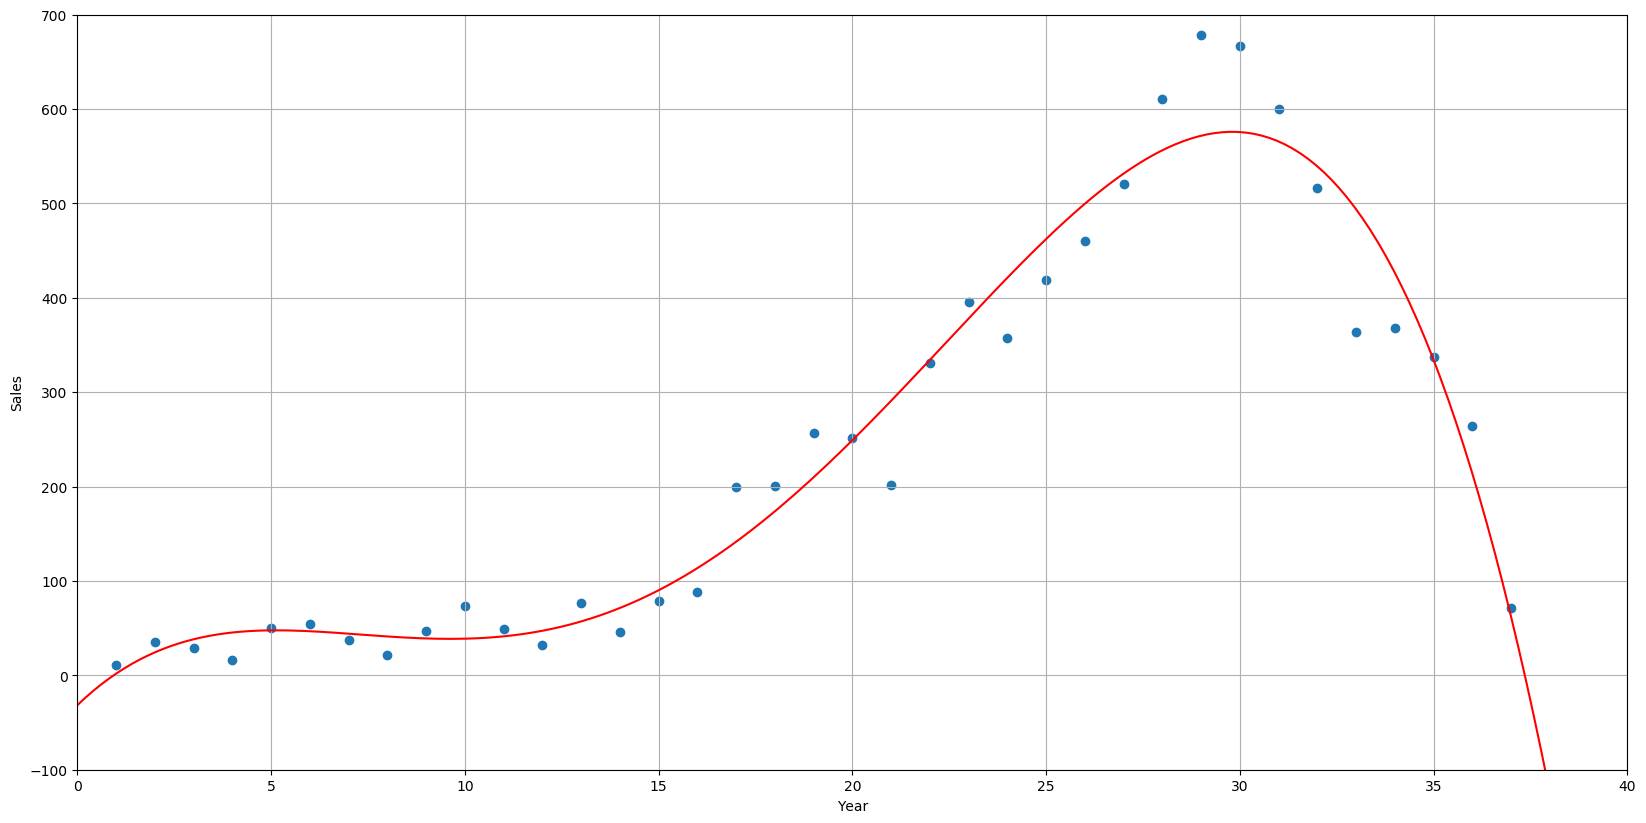

In [14]:
runplt()
plt.scatter(year,sales)
x_line = np.linspace(0, 40, 200)
plt.plot(x_line, model.predict(poly_reg.transform(x_line.reshape(x_line.shape[0], 1))), 'r-')

### 本文仓库地址为：[https://github.com/Unintented/data-mining-practice](https://github.com/Unintented/data-mining-practice)